# Melanoma Detection

The dataset consists of 2357 images of malignant and benign oncological diseases, which were formed from the International Skin Imaging Collaboration (ISIC). All images were sorted according to the classification taken with ISIC, and all subsets were divided into the same number of images, with the exception of melanomas and moles, whose images are slightly dominant.


### Problem Statement:
To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution that can evaluate images and alert dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.



## Data Description:

The data set contains the following categories:

- Actinic keratosis
- Basal cell carcinoma
- Dermatofibroma
- Melanoma
- Nevus
- Pigmented benign keratosis
- Seborrheic keratosis
- Squamous cell carcinoma
- Vascular lesion

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.layers import Rescaling
from sklearn.datasets import load_files
from keras.utils import np_utils


from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
data_dir_train = pathlib.Path(r"Skin cancer ISIC The International Skin Imaging Collaboration\Train")
data_dir_test = pathlib.Path(r'Skin cancer ISIC The International Skin Imaging Collaboration\Test')

In [3]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print("Train data consists of {} images.".format(image_count_train))

image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print("Test data consists of {} images.".format(image_count_test))


Train data consists of 2239 images.
Test data consists of 118 images.


### Creating Train and Validation dataset

In [4]:
# as per provide details we have to use some fixed parameters which are
batch_size = 32
img_width = 180
img_height = 180
epochs = 20
seed = 123

In [5]:
# Let's spilt the data into 80-20 i.e. 80% belongs to train and 20% belongs to validation
train_ds = image_dataset_from_directory(
  data_dir_train,
  validation_split=0.2,
  subset="training",
  seed=seed,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [6]:
val_ds = image_dataset_from_directory(
  data_dir_train,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [7]:
class_names = train_ds.class_names
print("As we can see that we have 9 category in our dataset. They are as follows:\n")
for i,j in enumerate(class_names):
    print(str(i+1) + ' - ' + j)

As we can see that we have 9 category in our dataset. They are as follows:

1 - actinic keratosis
2 - basal cell carcinoma
3 - dermatofibroma
4 - melanoma
5 - nevus
6 - pigmented benign keratosis
7 - seborrheic keratosis
8 - squamous cell carcinoma
9 - vascular lesion


### Visulaize the Data

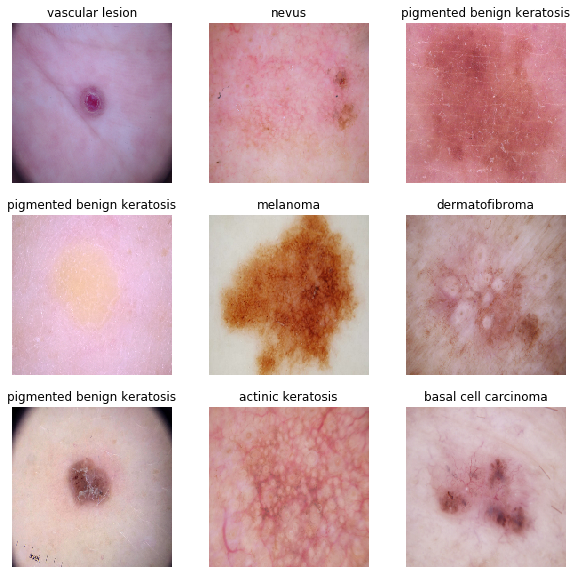

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [9]:
# Size of tensor
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 180, 180, 3)
(32,)


In [10]:
# To keep the tensor in cache
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

## Model building

In [11]:
# before building the model we have to rescale the data as it helps us to give equal importance to every pixel
# Build model

num_classes = len(class_names)

model = Sequential([
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])

In [12]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

In [14]:
# training the model
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 46s 652ms/step - loss: 2.0052 - accuracy: 0.2444 - val_loss: 1.8025 - val_accuracy: 0.3669
Epoch 2/20
56/56 [==============================] - 36s 638ms/step - loss: 1.6182 - accuracy: 0.4213 - val_loss: 1.5172 - val_accuracy: 0.5034
Epoch 3/20
56/56 [==============================] - 35s 624ms/step - loss: 1.3920 - accuracy: 0.5190 - val_loss: 1.5567 - val_accuracy: 0.4631
Epoch 4/20
56/56 [==============================] - 35s 617ms/step - loss: 1.3239 - accuracy: 0.5352 - val_loss: 1.2787 - val_accuracy: 0.5414
Epoch 5/20
56/56 [==============================] - 34s 611ms/step - loss: 1.1994 - accuracy: 0.5809 - val_loss: 1.4333 - val_accuracy: 0.5257
Epoch 6/20
56/56 [==============================] - 34s 613ms/step - loss: 1.1317 - accuracy: 0.6027 - val_loss: 1.3659 - val_accuracy: 0.5682
Epoch 7/20
56/56 [==============================] - 34s 612ms/step - loss: 1.0762 - accuracy: 0.6155 - val_loss: 1.3161 - val_accuracy: 0.5570

## Visualising the training results

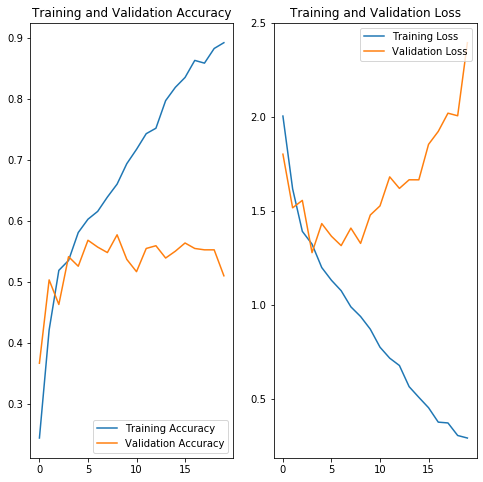

In [15]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

From above graph, we can see that training accuracy is increasing with each epochs and validation accuracy is not increasing with each epochs. We can observe that **training accuracy is high compared to validation accuracy** which means model has learned training data and not generalised it. It is a clear sign of **overfitting**. Overfit model has very low accuracy on unseen data.

Therefore, we have to overcome overfitting of data and build the model again.

Techniques to overcome overfitting are

- Data Augumentation
- Dropout Regularization

Hence, we will try to implement the same in the above model.

## Data Augumentation and Dropout Regularisation

In [16]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

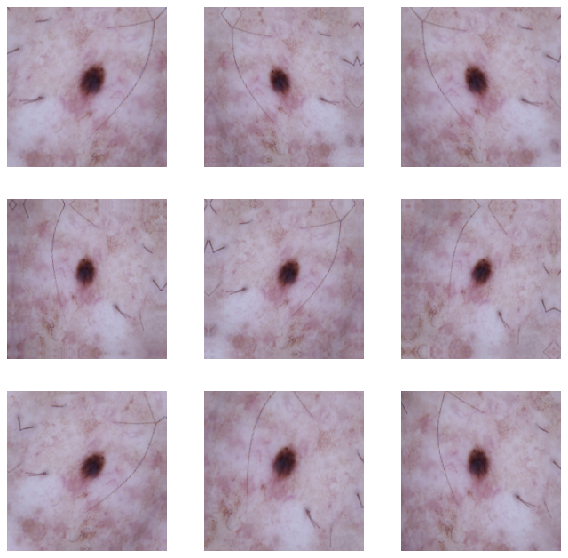

In [17]:
# let's visualise few augumented examples
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [18]:
# we will use augumented data for building model and also we will add dropout regularisation to the network to reduce overfitting

model = Sequential([
    data_augmentation,
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])

In [19]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [20]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                  

In [21]:
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 41s 728ms/step - loss: 1.8956 - accuracy: 0.2902 - val_loss: 1.8386 - val_accuracy: 0.3714
Epoch 2/20
56/56 [==============================] - 41s 730ms/step - loss: 1.6611 - accuracy: 0.4085 - val_loss: 1.6967 - val_accuracy: 0.4161
Epoch 3/20
56/56 [==============================] - 41s 728ms/step - loss: 1.5530 - accuracy: 0.4676 - val_loss: 1.5410 - val_accuracy: 0.4922
Epoch 4/20
56/56 [==============================] - 41s 731ms/step - loss: 1.5087 - accuracy: 0.4727 - val_loss: 1.4592 - val_accuracy: 0.5056
Epoch 5/20
56/56 [==============================] - 41s 731ms/step - loss: 1.4068 - accuracy: 0.5000 - val_loss: 1.3985 - val_accuracy: 0.5280
Epoch 6/20
56/56 [==============================] - 41s 736ms/step - loss: 1.3429 - accuracy: 0.5335 - val_loss: 1.4551 - val_accuracy: 0.5235
Epoch 7/20
56/56 [==============================] - 41s 728ms/step - loss: 1.2875 - accuracy: 0.5458 - val_loss: 1.3716 - val_accuracy: 0.5391

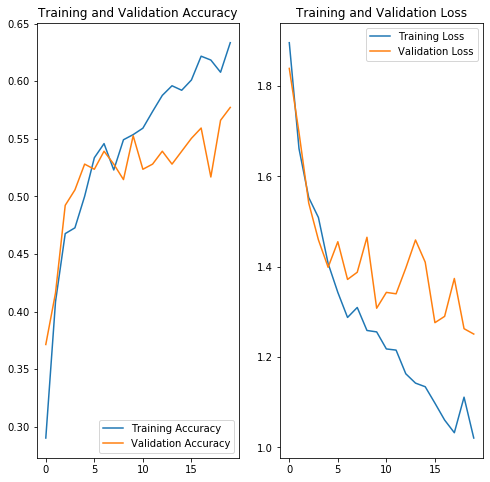

In [22]:
# Visualizing the data
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

We can observe that after applying `data augumentation` and `dropout regularization`, **training accuracy** decreased drastically(from 89% to 63% approx.) but the **overfitting** of data is reduced. **Training accuracy** and **validation accuracy** are much closer to each other compared to previous model.

### Visualizing the distribution of data

To view how data is distributed and check whether class imbalance is present or not.

In [23]:
# plotting the data distribution
def load_data_raw (path):
    data = load_files(path)
    files = np.array(data['filenames'])
    targets = np_utils.to_categorical(np.array(data['target']), 9)
    
    return files, targets

train_filenames, train_targets = load_data_raw(data_dir_train)

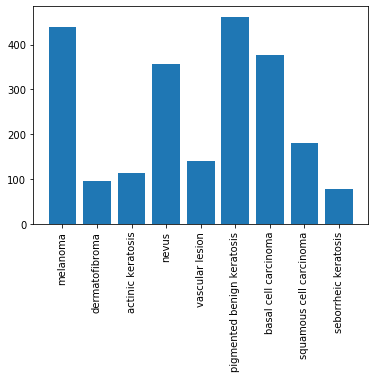

In [24]:
from collections import Counter
filenames_trimmed = [filename.split('\\')[-2] for filename in train_filenames]
classes_count = Counter(filenames_trimmed)

# Plot the classes
plt.bar(classes_count.keys(), classes_count.values())
plt.xticks(rotation = 90)
plt.show()

In [25]:
total = sum(classes_count.values())
for key,value in classes_count.items():
    classes_count[key] = (value/total)


                        Label  Percentage
0                    melanoma    0.195623
1              dermatofibroma    0.042430
2           actinic keratosis    0.050916
3                       nevus    0.159446
4             vascular lesion    0.062081
5  pigmented benign keratosis    0.206342
6        basal cell carcinoma    0.167932
7     squamous cell carcinoma    0.080840
8        seborrheic keratosis    0.034390


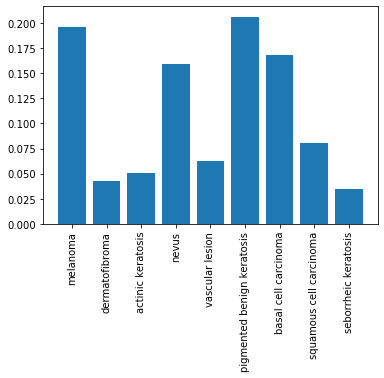

In [26]:
# Plot the classes
print(pd.DataFrame(classes_count.items(),columns=['Label', 'Percentage']))
plt.bar(classes_count.keys(), classes_count.values())
plt.xticks(rotation = 90)
plt.show()

We can observe that `seborrheic keratosis` has **least number of sample.**

`pigmented benign keratosis` and `melanoma` has **high proportion** of data approx. **20.6%** and **19.5%** respectively

We can say that there is high class imbalance in the data as around 40% of data is of 2 classes

### Treating class imbalance

In [27]:
import Augmentor
path_to_training_dataset="./Skin cancer ISIC The International Skin Imaging Collaboration/Train"
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset+str("/") + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Executing Pipeline:   0%|                                                                | 0/500 [00:00<?, ? Samples/s]

Initialised with 114 image(s) found.
Output directory set to ./Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x224015E3408>: 100%|█| 500/500 [00:08<00:00, 55.75 Samples/
Executing Pipeline:   0%|                                                                | 0/500 [00:00<?, ? Samples/s]

Initialised with 376 image(s) found.
Output directory set to ./Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x22401542448>: 100%|█| 500/500 [00:09<00:00, 54.24 Samples/
Executing Pipeline:   0%|                                                                | 0/500 [00:00<?, ? Samples/s]

Initialised with 95 image(s) found.
Output directory set to ./Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x224015B20C8>: 100%|█| 500/500 [00:11<00:
Executing Pipeline:   0%|                                                                | 0/500 [00:00<?, ? Samples/s]

Initialised with 438 image(s) found.
Output directory set to ./Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x22400BED788>: 100%|█| 500/500 [00:49<00:00, 10.04 Samples
Executing Pipeline:   0%|                                                                | 0/500 [00:00<?, ? Samples/s]

Initialised with 357 image(s) found.
Output directory set to ./Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus\output.

Processing <PIL.Image.Image image mode=RGB size=919x802 at 0x22401534A08>: 100%|█| 500/500 [00:44<00:00, 11.19 Samples/
Executing Pipeline:   0%|                                                                | 0/500 [00:00<?, ? Samples/s]

Initialised with 462 image(s) found.
Output directory set to ./Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2245FD61348>: 100%|█| 500/500 [00:09<00:00, 54.27 Samples/
Executing Pipeline:   0%|                                                                | 0/500 [00:00<?, ? Samples/s]

Initialised with 77 image(s) found.
Output directory set to ./Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x22400927208>: 100%|█| 500/500 [00:22<00:00, 22.18 Samples
Executing Pipeline:   0%|                                                                | 0/500 [00:00<?, ? Samples/s]

Initialised with 181 image(s) found.
Output directory set to ./Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x22401774BC8>: 100%|█| 500/500 [00:09<00:
Executing Pipeline:   0%|                                                                | 0/500 [00:00<?, ? Samples/s]

Initialised with 139 image(s) found.
Output directory set to ./Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2240153EDC8>: 100%|█| 500/500 [00:09<00:00, 52.89 Samples/


In [28]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


In [29]:
from glob import *
path_list_new = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list_new

['Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_9e25705b-fc9a-425a-a53a-c6d5a19b0511.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025803.jpg_0244d9e6-1671-4971-a738-e81dcfd87234.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025803.jpg_5146d856-38ac-4fa7-9de8-1aa4a6942687.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025803.jpg_93ebd9e2-ed2f-49e0-bf99-85b39d65d6c9.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025803.jpg_b24c6528-e50c-4a72-b896-62c3b3d50e89.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration\\Train

In [30]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic 

## Building the model with augumented data

In [31]:
data_dir_train = pathlib.Path(r"Skin cancer ISIC The International Skin Imaging Collaboration\Train")
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "training",
  image_size = (img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


In [32]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "validation",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


In [33]:
class_names = train_ds.class_names
print("As we can see that we have 9 category in our dataset. They are as follows:\n")
for i,j in enumerate(class_names):
    print(str(i+1) + ' - ' + j)

As we can see that we have 9 category in our dataset. They are as follows:

1 - actinic keratosis
2 - basal cell carcinoma
3 - dermatofibroma
4 - melanoma
5 - nevus
6 - pigmented benign keratosis
7 - seborrheic keratosis
8 - squamous cell carcinoma
9 - vascular lesion


In [34]:
# before building the model we have to rescale the data as it helps us to give equal importance to every pixel
# Build model

num_classes = len(class_names)

model = Sequential([
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),## normalization
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])

In [35]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [36]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 45, 45, 64)       

In [37]:
# training the model
epochs=30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
169/169 [==============================] - 133s 775ms/step - loss: 1.8380 - accuracy: 0.2839 - val_loss: 1.5264 - val_accuracy: 0.4098
Epoch 2/30
169/169 [==============================] - 124s 728ms/step - loss: 1.4446 - accuracy: 0.4501 - val_loss: 1.4291 - val_accuracy: 0.4722
Epoch 3/30
169/169 [==============================] - 124s 730ms/step - loss: 1.2901 - accuracy: 0.5124 - val_loss: 1.2509 - val_accuracy: 0.5397
Epoch 4/30
169/169 [==============================] - 124s 729ms/step - loss: 1.1363 - accuracy: 0.5846 - val_loss: 1.1471 - val_accuracy: 0.5828
Epoch 5/30
169/169 [==============================] - 124s 727ms/step - loss: 0.9773 - accuracy: 0.6376 - val_loss: 1.0007 - val_accuracy: 0.6437
Epoch 6/30
169/169 [==============================] - 124s 731ms/step - loss: 0.8452 - accuracy: 0.6903 - val_loss: 0.8903 - val_accuracy: 0.6763
Epoch 7/30
169/169 [==============================] - 123s 727ms/step - loss: 0.7169 - accuracy: 0.7372 - val_loss: 0.8964 -

## Visualising the training results

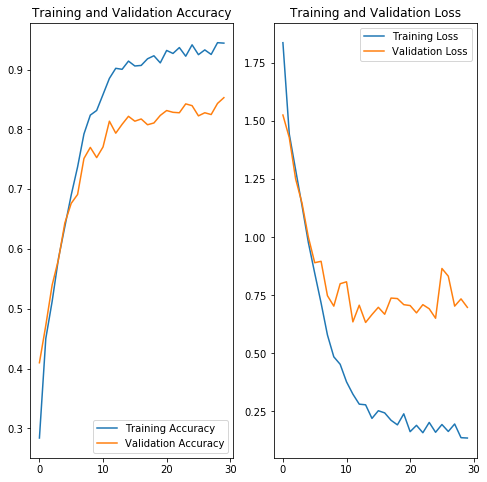

In [38]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

We can see that we have **reduced the overfitting** as well as **increased the training accuracy and validation accuracy** with the help of sampling method.

## Conclusion

Following are the conclusions:

- Initially we build a simple CNN model, we got an training accuracy of around 89% and validation accuracy of around 51%. It is a clear sign of overfitting.
- We have seen that, with the help of **data augmented method** and **dropout regularization method, overfitting of the data can be reduced.** In our case it reduced the overfitting, but decreased our training accuracy(approx. 63%) and validation accuracy(approx. 57%).
- To increase the accuracy of both training and validation with overfitting in check, we used augmented sampling technique with dropout regularization.
- We can see that training accuracy increased from around 63% to approx. 94% and validation accuracy from around 57% to approx. 85% with removal of overfitting.